In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rohitgrewal_airlines_flights_data_path = kagglehub.dataset_download('rohitgrewal/airlines-flights-data')

print('Data source import complete.')


Data source import complete.


# Airline Pricing Analysis
**Goal:** Explore how ticket prices vary by class, airline, destination/source, and timing to provide actionable pricing insights.

**Key Questions**
-What are the airlines in the dataset, accompanied by their frequencies?

- Does price varies with airlines ?

- Does ticket price change based on the departure time and arrival time?

- How the price changes with change in Source and Destination?

- How is the price affected when tickets are bought in just 1 or 2 days before departure?

- How does the ticket price vary between Economy and Business class?



#Load Data


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/kaggle/input/airlines-flights-data/airlines_flights_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
#Cleaning Dataset (dropping index column)

df.drop(columns = 'index', inplace = True)

In [ ]:
#sneak peak into df structure
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


#Clean


In [ ]:
#Cleaning Na from dataset

print(df.dtypes)
print(df.columns.isnull().sum())
for col in df.columns:
  missing = df[col].isnull().sum()
  print(f" {col} is missing {missing} amount of")

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object
0
 airline is missing 0 amount of
 flight is missing 0 amount of
 source_city is missing 0 amount of
 departure_time is missing 0 amount of
 stops is missing 0 amount of
 arrival_time is missing 0 amount of
 destination_city is missing 0 amount of
 class is missing 0 amount of
 duration is missing 0 amount of
 days_left is missing 0 amount of
 price is missing 0 amount of


In [ ]:
# basic overview
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


# Exploratory Data Analysis


In [ ]:
#frequency of all airlines listed in dataset


air_freq = df['airline'].value_counts().sort_values(ascending = False)
air_freq

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

Text(0.5, 1.0, 'Percent of flights in dataset based on Airline')

<Figure size 800x800 with 0 Axes>

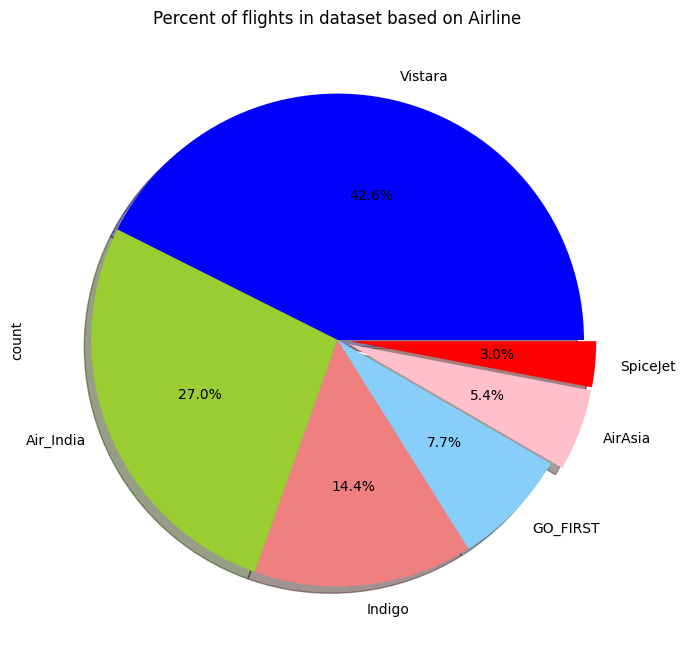

In [ ]:
#Q.1. What are the airlines in the dataset, accompanied by their frequencies?

#pie chart demonstrating the value counts in the airline column
freq_explode = [0,0,0,0,.05,.05]
plt.figure(figsize=(8,8))
colors = ['blue', 'yellowgreen', 'lightcoral', 'lightskyblue', 'pink','red' ]
plt.figure(figsize = (8,8))
air_freq.plot(kind = 'pie', autopct='%1.1f%%', explode = freq_explode, colors = colors,  rot = 100, shadow= True)
plt.title('Percent of flights in dataset based on Airline')


Text(0, 0.5, 'Number of flights')

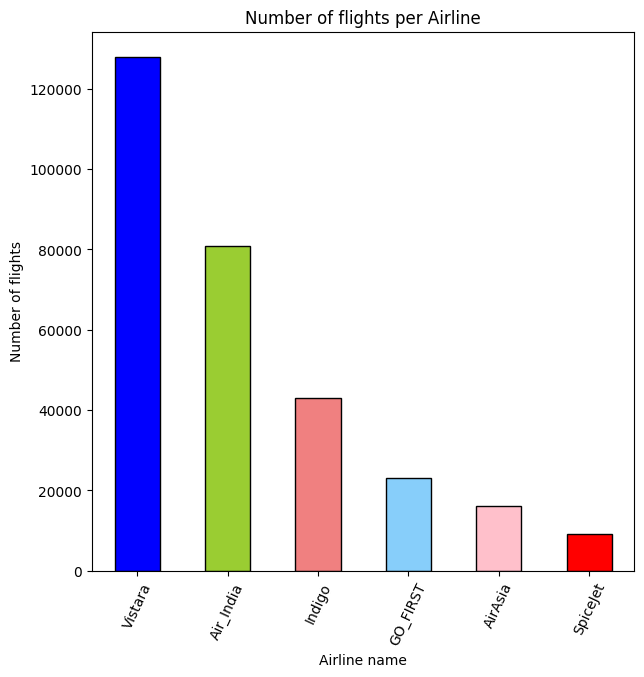

In [ ]:
# A bar chart showing the airlines and number of corresponding flights from highest to lowest
plt.figure(figsize = (7,7))

air_freq.plot(kind = 'bar', rot = 65, color = ['blue', 'yellowgreen', 'lightcoral', 'lightskyblue', 'pink','red' ], edgecolor = 'black')
plt.title('Number of flights per Airline')
plt.xlabel('Airline name')
plt.ylabel('Number of flights')

(0.0, 100000.0)

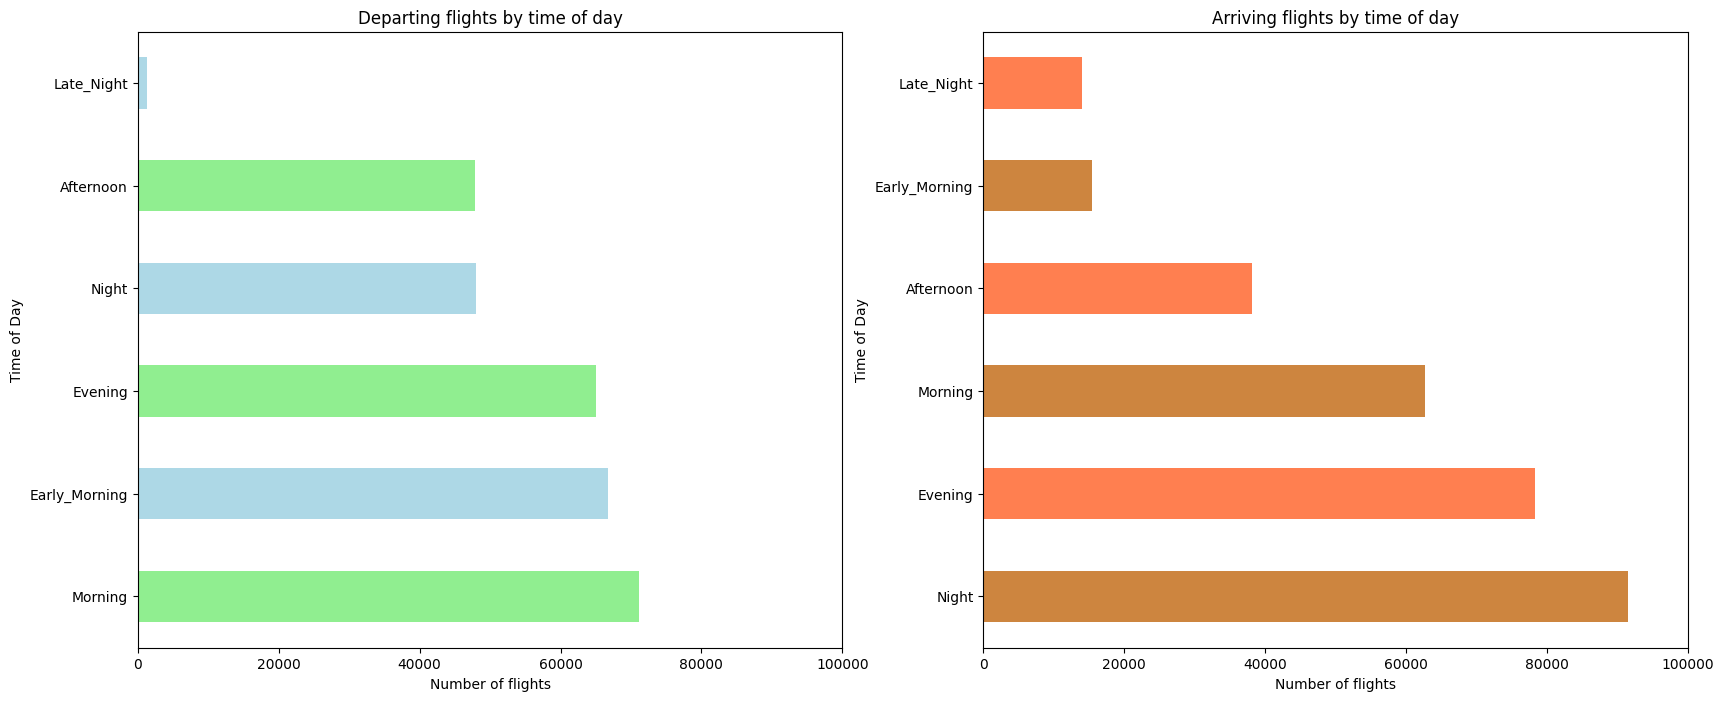

In [ ]:
#Q.2. Show Bar Graphs representing the Departure Time & Arrival Time.




#preparing tables to show arrival and departure times
a_times = df['arrival_time'].value_counts()
d_times = df['departure_time'].value_counts()


#establish uniform order

category_order = ['Early_morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']

#creating figure and showing both charts

plt.figure(figsize = (20, 8))
#Departure subplot
plt.subplot(1,2,1)
d_times.plot(kind = 'barh', color= ['lightgreen', 'lightblue'])
plt.title('Departing flights by time of day')
plt.xlabel('Number of flights')
plt.ylabel('Time of Day')
plt.xlim(0,100000)



#Arrival subplot
plt.subplot(1,2,2)
a_times.plot(kind = 'barh', color =['peru', 'coral'])
plt.title('Arriving flights by time of day')
plt.xlabel('Number of flights')
plt.ylabel('Time of Day')
plt.xlim(0,100000)

Text(0, 0.5, 'Number of flights')

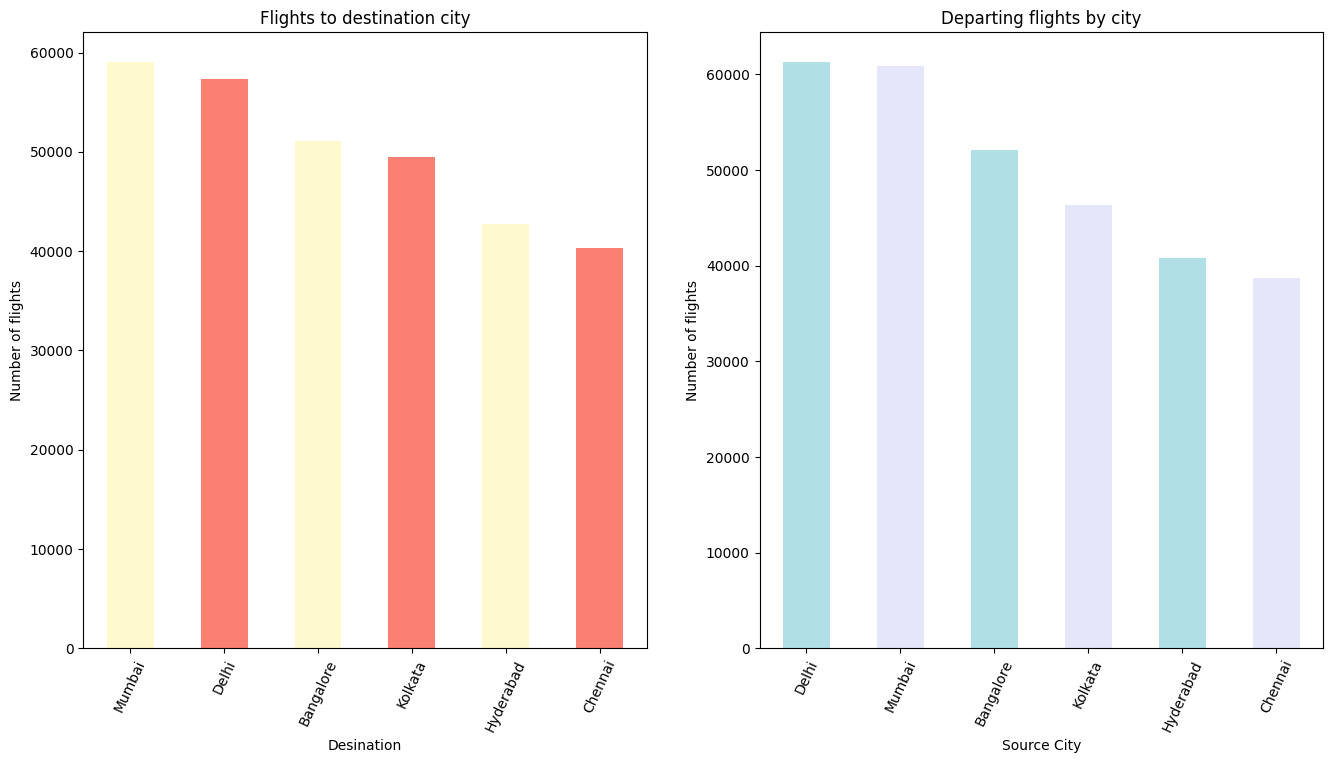

In [ ]:
#Q.3. Show Bar Graphs representing the Source City & Destination City.
#preparing tables to show arrival and destination cities
dest = df['destination_city'].value_counts()
source = df['source_city'].value_counts()

#creating figure and showing both charts

plt.figure(figsize = (16, 8))
#Destination subplot
plt.subplot(1,2,1)
dest.plot(kind = 'bar', color= ['lemonchiffon', 'salmon'], rot = 65)
plt.title('Flights to destination city')
plt.xlabel('Desination')
plt.ylabel('Number of flights')

#Arrival subplot
plt.subplot(1,2,2)
source.plot(kind = 'bar', color =['powderblue', 'lavender'], rot = 65)
plt.title('Departing flights by city')
plt.xlabel('Source City')
plt.ylabel('Number of flights')

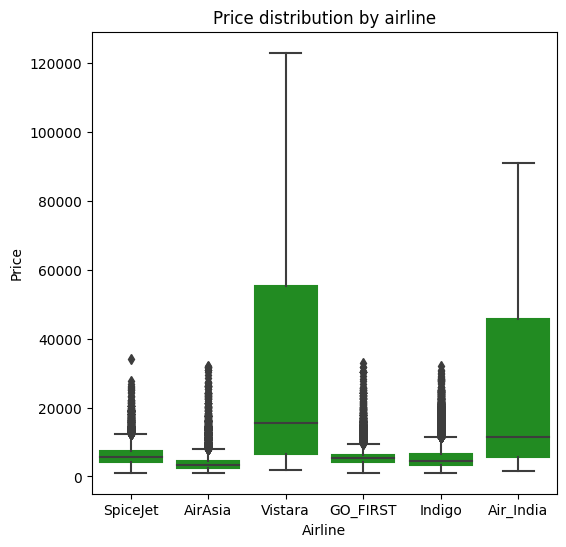

In [ ]:
#Does price varies with airlines ?

plt.figure(figsize  = (6,6))
sns.boxplot(x='airline', y='price', data=df,
            boxprops=dict(facecolor='pink', color='forestgreen')

            )
plt.title('Price distribution by airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()




/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(-12.430555555555555, 0.5, 'Price')

<Figure size 800x800 with 0 Axes>

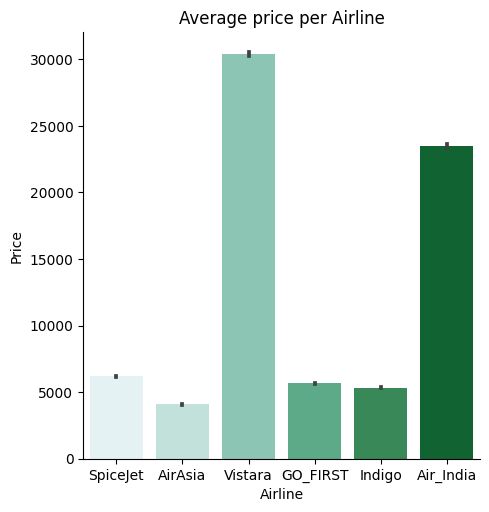

In [ ]:
plt.figure(figsize =  (8,8))
sns.catplot(data =df, x = 'airline', y = 'price', kind = 'bar', palette = 'BuGn',  )
plt.title('Average price per Airline')
plt.xlabel('Airline')
plt.ylabel('Price')


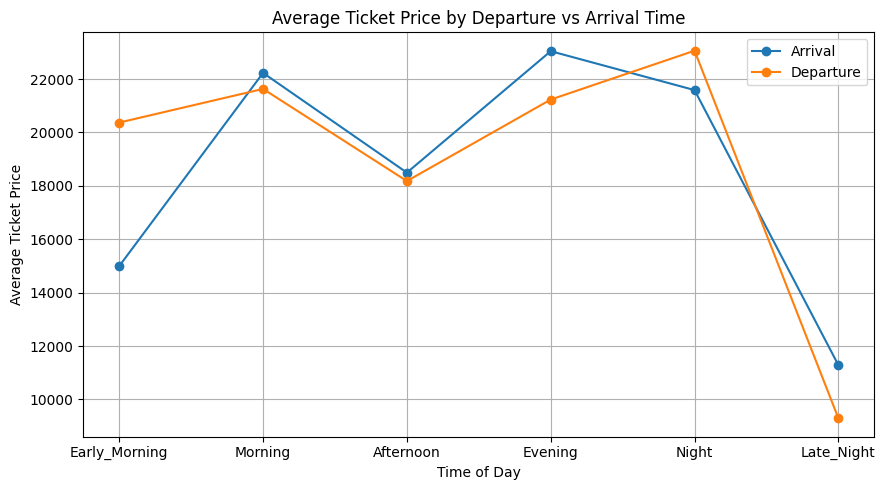

In [ ]:
##Q.5. Does ticket price change based on the departure time and arrival time?
#Find average price for times at departure and arrival

dep = df.groupby('departure_time')['price'].mean().reset_index()
dep = dep.rename(columns={'departure_time': 'Time', 'price': 'Price'})
dep['Type'] = 'Departure'

arr = df.groupby('arrival_time')['price'].mean().reset_index()
arr = arr.rename(columns={'arrival_time': 'Time', 'price': 'Price'})
arr['Type'] = 'Arrival'


combined_time = pd.concat([dep, arr], ignore_index=True)

#sort categorical times
time_order = ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']
combined_time['Time'] = pd.Categorical(combined_time['Time'], categories=time_order, ordered=True)

#for loop for departure and arrival and plot creation
plt.figure(figsize = (9,5))
for label, g in combined_time.groupby('Type'):
    g = g.sort_values('Time')
    plt.plot(g['Time'], g['Price'], marker='o', label=label)

plt.xlabel('Time of Day')
plt.ylabel('Average Ticket Price')
plt.title('Average Ticket Price by Departure vs Arrival Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



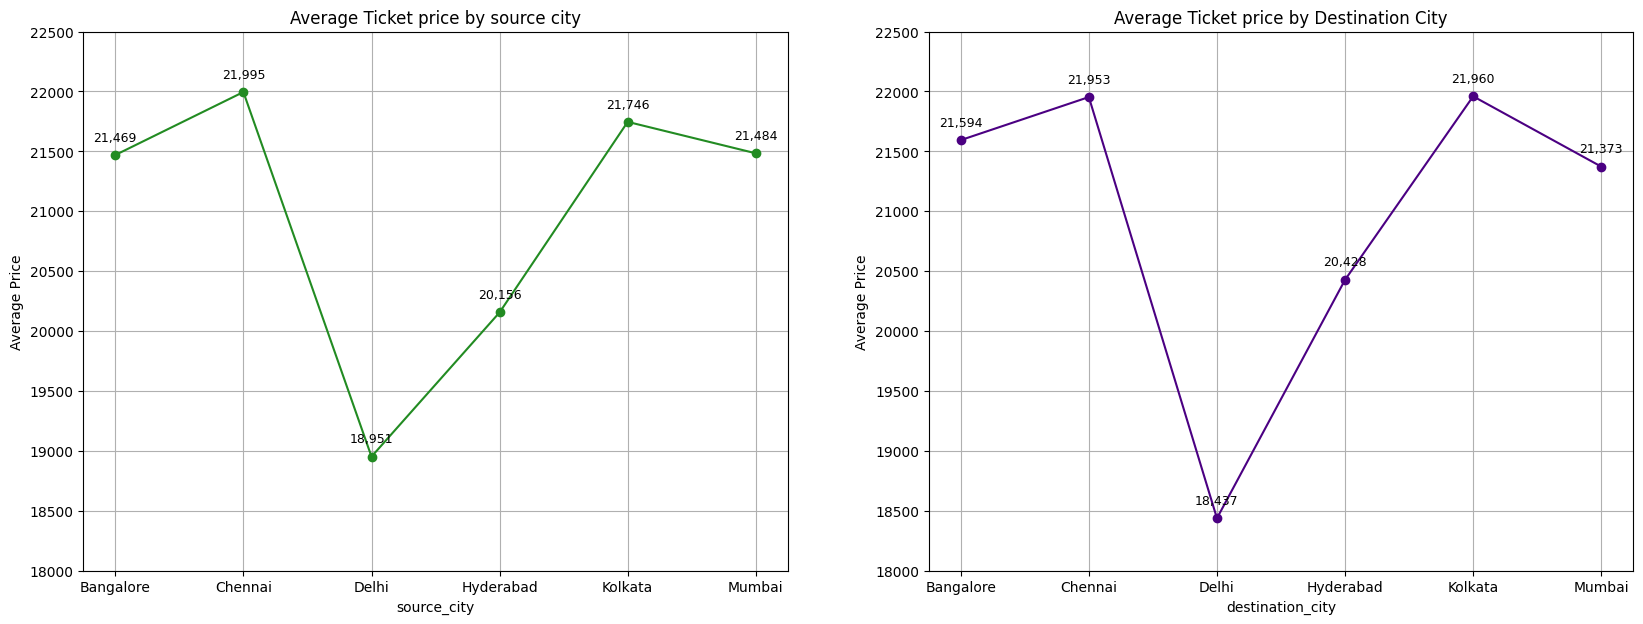

In [ ]:
#Q.6. How the price changes with change in Source and Destination?


p_source = df.groupby('source_city')['price'].mean()
p_dest   = df.groupby('destination_city')['price'].mean()

import matplotlib.pyplot as plt

def label_points(ax, fmt="{:,.0f}"):

    line = ax.lines[0]
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.annotate(fmt.format(y),
                    (x, y),
                    textcoords="offset points",
                    xytext=(0, 8),   # vertical offset in points
                    ha='center', va='bottom', fontsize=9)

plt.figure(figsize=(20, 7))

# Left subplot
ax1 = plt.subplot(1, 2, 1)
p_source.plot(ax=ax1, kind='line', marker='o', color='forestgreen', grid=True)
ax1.set(ylim=(18000, 22500), title='Average Ticket price by source city', ylabel='Average Price')
label_points(ax1)

# Right subplot
ax2 = plt.subplot(1, 2, 2)
p_dest.plot(ax=ax2, kind='line', marker='o', color='indigo', grid=True)
ax2.set(ylim=(18000, 22500), title='Average Ticket price by Destination City', ylabel='Average Price')
label_points(ax2)




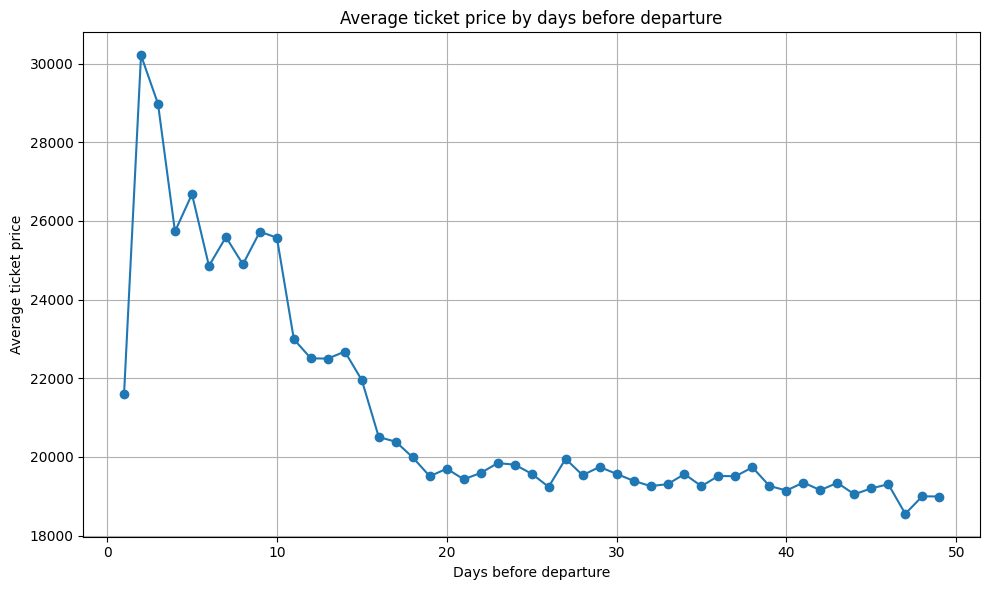

In [ ]:
#Q.7. How is the price affected when tickets are bought in just 1 or 2 days before departure?


# Average price by exact days_left
avg = (df.groupby('days_left', as_index=False)['price']
         .mean()
         .sort_values('days_left'))


fig, ax = plt.subplots(figsize=(10,6))
ax.plot(avg['days_left'], avg['price'], marker='o')
ax.set_title('Average ticket price by days before departure')
ax.set_xlabel('Days before departure')
ax.set_ylabel('Average ticket price')
ax.grid(True)



plt.tight_layout()
plt.show()



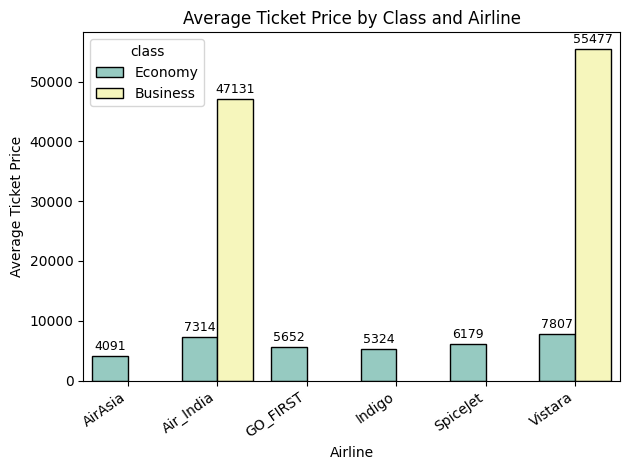

In [ ]:
#Q.8. How does the ticket price vary between Economy and Business class?


p_class = (
    df.groupby(['airline', 'class'])['price']
      .mean()
      .rename('price')
      .reset_index()
)


ax = sns.barplot(
    data=p_class,
    x='airline', y='price', hue='class',
    palette='Set3', edgecolor='black'
)
ax.set_title('Average Ticket Price by Class and Airline')
ax.set_xlabel('Airline'); ax.set_ylabel('Average Ticket Price')
plt.xticks(rotation=35, ha='right')

# optional: value labels
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f', padding=2, fontsize=9)

plt.tight_layout()
plt.show()


(20000.0, 121000.0)

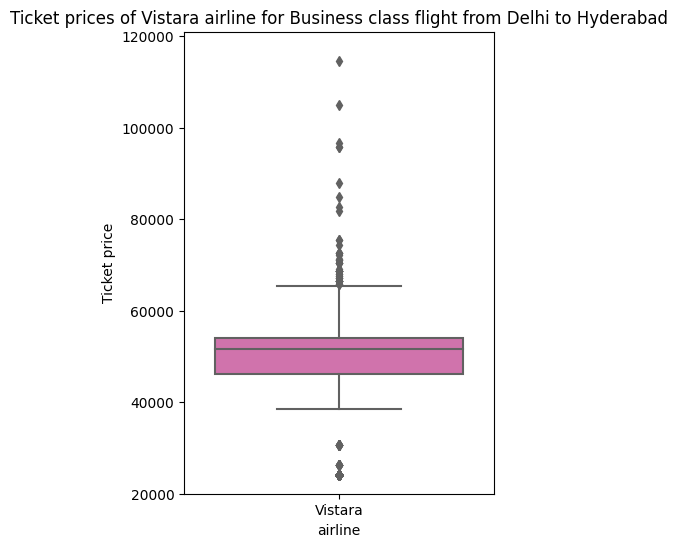

In [ ]:
#Q.9. What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class ?

vistara_price = df[(df['airline'] == 'Vistara') & (df['destination_city'] == 'Hyderabad') & (df['source_city'] =='Delhi') &  (df['class'] == 'Business')]
plt.figure(figsize = (4,6))
sns.boxplot(data = vistara_price, x = 'airline', y = 'price', palette = 'PuRd')
plt.ylabel("Ticket price")
plt.title('Ticket prices of Vistara airline for Business class flight from Delhi to Hyderabad')
plt.ylim(20000, 121000)



In [ ]:
print('The average ticket price for Vistara airline for Business class flight from Delhi to Hyderabad was: ', vistara_price['price'].mean() )


The average ticket price for Vistara airline for Business class flight from Delhi to Hyderabad was:  47939.840361445786


# Price Prediction Model

In [ ]:
from scipy import stats

eco = df.loc[df['class'].str.lower() == 'economy', 'price'].dropna()
biz = df.loc[df['class'].str.lower() == 'business', 'price'].dropna()

t, p = stats.ttest_ind(eco, biz, equal_var=False)
uplift = (biz.mean() / eco.mean() - 1) * 100


print(f"T-statistic: {t:.2f}")
print(f"P-value: {p:.3g}")
print(f"Average uplift: {uplift:.1f}%")


T-statistic: -1063.84
P-value: 0
Average uplift: 699.4%


**T-test results:** Business fares are on average **~700% higher** than Economy (p < 0.001), a difference that is statistically significant.



In [ ]:
#importing SciKit-Learn tools for model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np


In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
#Feature selection

features = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left']
X = df[features]

#target variable
y = df['price']

#separate categorical and numerical features
categorical_cols = [c for c in X.columns if X[c].dtype == "object"]
numerical_cols = [c for c in X.columns if X[c].dtype in ["int64", "float64"]]

#Train, test, and validation splitting
X_train, X_valid, y_train, y_valid = train_test_split (X, y, train_size = 0.8, test_size = 0.2, random_state = 1)


#Numerical Preprocessing
numerical_trans = SimpleImputer(strategy= 'constant')

#Data Preprossesing (One Hot Encoding categorical variables)
categorical_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

#combine numerical and categorical preprocessing
preprocess = ColumnTransformer (
    transformers = [
        ('num', numerical_trans, numerical_cols),
        ('cat', categorical_trans, categorical_cols)
    ])

#model
model = RandomForestRegressor(n_estimators= 50, random_state = 1)


#pipeline

pline = Pipeline(steps= [('preprocessor', preprocess), ('model', model)])

#fitting the model
pline.fit(X_train, y_train)

#preditction
pred = pline.predict(X_valid)

#evaluate model
mae = mean_absolute_error(y_valid, pred)
r2 = r2_score(y_valid, pred)
print(f"MAE: ${mae:,.2f}")
print(f"R²: {r2:.3f}")








MAE: $1,064.81
R²: 0.985


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


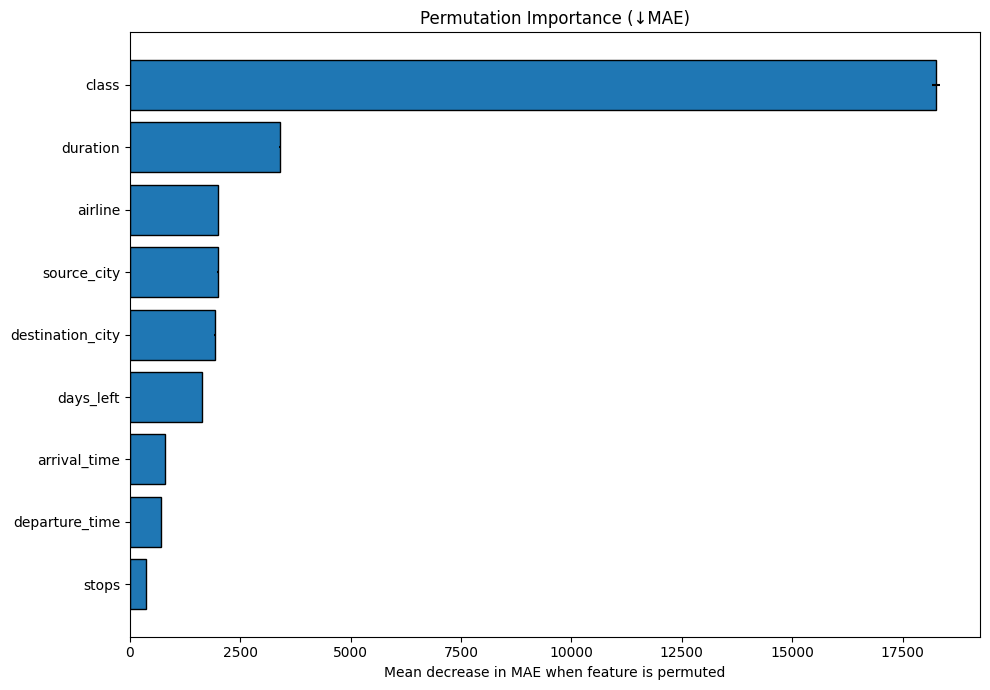

,feature,importance,std
6,class,18246.777966,88.439478
7,duration,3393.892207,11.961652
0,airline,2003.217029,13.134275
1,source_city,1992.803599,10.648192
5,destination_city,1917.195657,7.555744
8,days_left,1638.145479,10.265280
4,arrival_time,804.656588,6.713357
2,departure_time,703.171296,4.890842
3,stops,367.241385,3.352062


In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd

result = permutation_importance(
    pline, X_valid, y_valid,
    n_repeats=10, random_state=42, n_jobs=-1, scoring='neg_mean_absolute_error'
)

imp = pd.DataFrame({
    "feature": X_valid.columns,
    "importance": result.importances_mean,
    "std": result.importances_std
}).sort_values("importance", ascending=False)

topk = 15  # show top features
imp_top = imp.head(topk).sort_values("importance")

plt.figure(figsize=(10,7))
plt.barh(imp_top["feature"], imp_top["importance"], xerr=imp_top["std"], edgecolor='black')
plt.title("Permutation Importance (↓MAE)")
plt.xlabel("Mean decrease in MAE when feature is permuted")
plt.tight_layout()


plt.show()

imp.head(10)


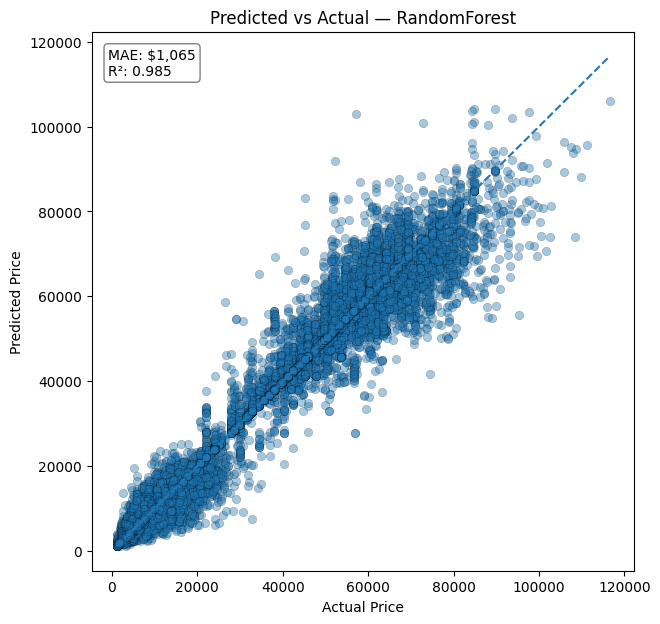

In [ ]:
#predicted vs actual graph

y_true = y_valid
y_pred = pred

mae = mean_absolute_error(y_true, y_pred)
r2  = r2_score(y_true, y_pred)

plt.figure(figsize=(7,7))
plt.scatter(y_true, y_pred, alpha=0.4, edgecolor='k', linewidths=0.3)
m, M = float(min(y_true.min(), y_pred.min())), float(max(y_true.max(), y_pred.max()))
plt.plot([m, M], [m, M], ls='--')
plt.title('Predicted vs Actual — RandomForest')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.text(0.03, 0.97, f"MAE: ${mae:,.0f}\nR²: {r2:.3f}", transform=plt.gca().transAxes,
         va='top', ha='left', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray'))

plt.show()
plt.savefig("figs/permutation_importance_rf.png", dpi=300, bbox_inches="tight")
plt.savefig("figs/permutation_importance_rf.svg", bbox_inches="tight")

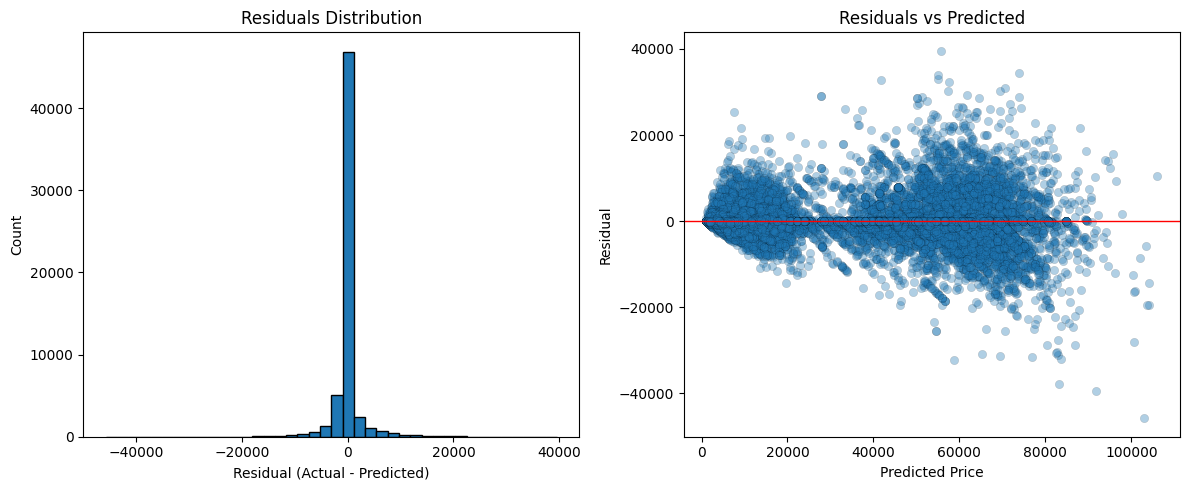

In [ ]:
res = y_true - y_pred

# Residuals histogram
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(res, bins=40, edgecolor='black')
plt.title('Residuals Distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Count')

# Residuals v. Fitted
plt.subplot(1,2,2)
plt.scatter(y_pred, res, alpha=0.35, edgecolor='k', linewidths=0.2)
plt.axhline(0, color='red', ls='-', lw=1)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Price')
plt.ylabel('Residual')
plt.tight_layout()
# save_figure("figs/residuals_rf")
plt.show()


In [ ]:
#current versions of libraries

import sys, platform, numpy, pandas, matplotlib, seaborn, sklearn
print("Python:", sys.version.split()[0], "| OS:", platform.system())
print("numpy:", numpy.__version__, "pandas:", pandas.__version__)
print("matplotlib:", matplotlib.__version__, "seaborn:", seaborn.__version__)
print("scikit-learn:", sklearn.__version__)

Python: 3.11.13 | OS: Linux
numpy: 1.26.4 pandas: 2.2.3
matplotlib: 3.7.2 seaborn: 0.12.2
scikit-learn: 1.2.2
